In [1]:
import sys
sys.path.append('..')
import quarantines as Q
import quarantines_mongo as qm
import graph_generators as gg 
import networkx as nx 
import networkit as nk
import pymongo
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from tabulate import tabulate
from scipy import stats
from pprint import pprint
import random
sns.set()

In [3]:
def get_peak_width(G, tau, gamma, rho, num_iter=10, tmax=float('inf')):
    # Runs an SIR graph and collects the peak-width (in terms of time) 
    iters = [Q.run_until_prop_IR(G, tau, gamma, rho, float('inf'), 2.0)[1] for _ in range(num_iter)]
    return iters

In [4]:
G = gg.plc_graph(10 ** 4, 10, 0.5)

In [5]:
output = get_peak_width(G, 1, 1, 10 /len(G), num_iter=3)

In [46]:
G =gg.load_gemsec_fb('company')
peak_widths = []
maxrange = 0.25
for i in range(20):
    prop = i / 20 * maxrange
    G2 = Q.run_until_prop_IR(G,  0.5, 1, 10/len(G), float('inf'), prop)[0]
    tupout = Q.run_until_prop_IR(G2, 0.5, 1, 10/ len(G2), float('inf'), 2.0)[1]
    peak_widths.append((prop, tupout.get_peak_width()))

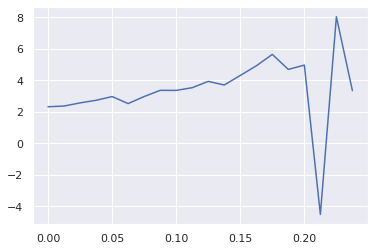

In [47]:
plt.plot(*zip(*peak_widths))

No handles with labels found to put in legend.


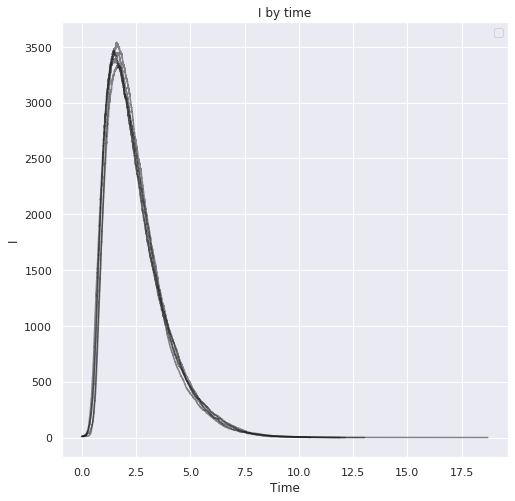

In [37]:
Q.quarantine_by_prop(G, 0.5, 1, 10 / len(G), [0.0], float('inf'), num_iter=5).plot_single('I')

No handles with labels found to put in legend.


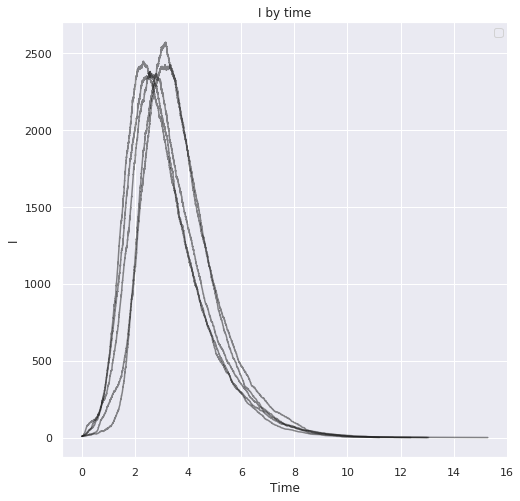

In [45]:
G2 = Q.run_until_prop_IR(G,  0.25, 1, 10/len(G), float('inf'), 0.15)[0]
Q.quarantine_by_prop(G2, 1.0, 1, 10 / len(G), [0.], float('inf'), num_iter=5).plot_single('I')

In [ ]:
max(enumerate(output[0].I), key=lambda p: p[1])